# DELTA

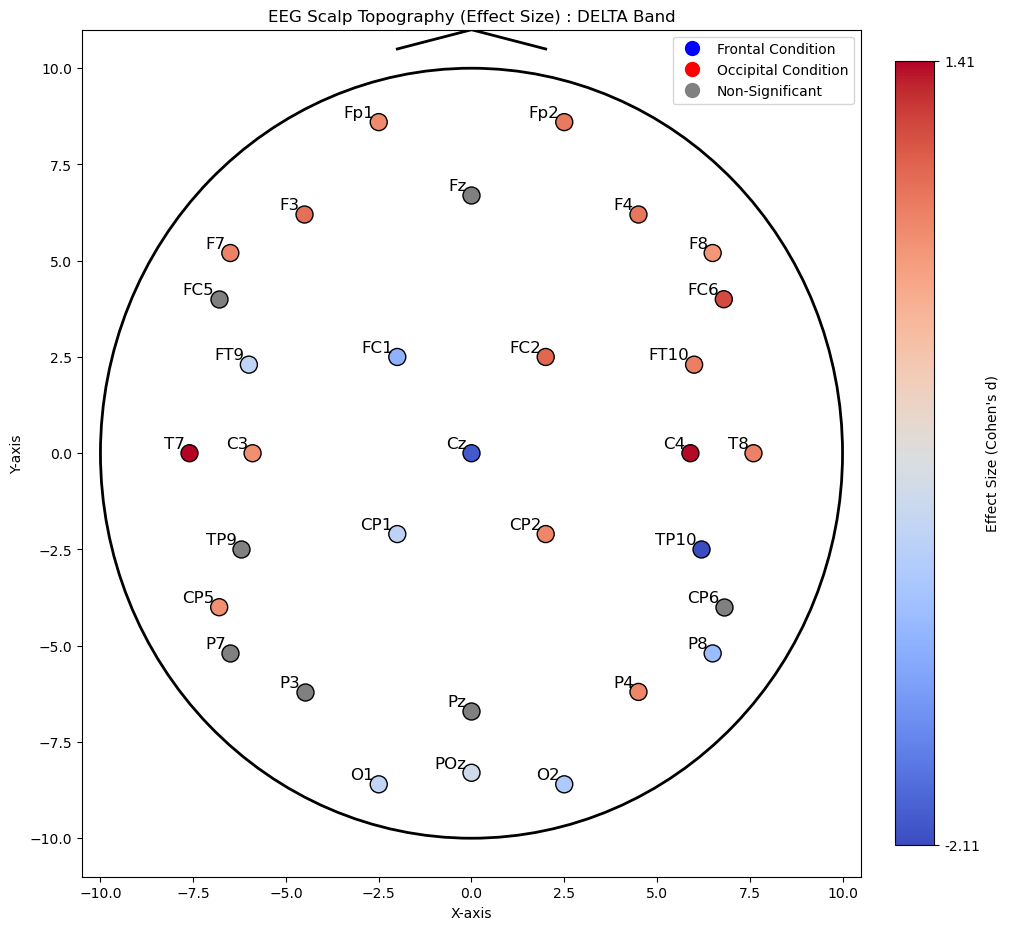

In [193]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines

file1 = r"C:\Users\nirvi\Downloads\power_spectrum.csv"
file2 = r"C:\Users\nirvi\Downloads\power_spectrum_oc.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

assert df1.shape == df2.shape, "Files do not have the same dimensions!"

df1_linear = 10**(df1 / 10)
df2_linear = 10**(df2 / 10)

alpha = 0.05

p_values = []
effect_sizes = []
row_indices = []

def cohen_d(x, y):
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

for i in range(len(df1_linear)):
    x, y = df1_linear.iloc[i, 0:20].values, df2_linear.iloc[i, 0:20].values

    t_stat, p_value = stats.ttest_rel(x, y)
    effect_size = cohen_d(x, y)

    p_values.append(p_value)
    effect_sizes.append(effect_size)
    row_indices.append(i)

_, p_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

results_df = pd.DataFrame({
    "Row_Index": row_indices,
    "Corrected_P_Value": p_corrected,
    "Effect_Size": effect_sizes
})

significant_df = results_df[(results_df["Corrected_P_Value"] < alpha) & (abs(results_df["Effect_Size"]) >= 0.2)]
non_significant_df = results_df[results_df["Corrected_P_Value"] >= alpha]

# ===================== PLOT 2D SCALP TOPOGRAPHY ===================== #
electrode_positions = {
    "Fp1": (-2.5, 8.6), "Fp2": (2.5, 8.6), "F3": (-4.5, 6.2), "F4": (4.5, 6.2),
    "C3": (-5.9, 0.0), "C4": (5.9, 0.0), "P3": (-4.5, -6.2), "P4": (4.5, -6.2),
    "O1": (-2.5, -8.6), "O2": (2.5, -8.6), "F7": (-6.5, 5.2), "F8": (6.5, 5.2),
    "T7": (-7.6, 0.0), "T8": (7.6, 0.0), "P7": (-6.5, -5.2), "P8": (6.5, -5.2),
    "Fz": (0.0, 6.7), "Cz": (0.0, 0.0), "Pz": (0.0, -6.7), "POz": (0.0, -8.3),
    "FC1": (-2.0, 2.5), "FC2": (2.0, 2.5), "CP1": (-2.0, -2.1), "CP2": (2.0, -2.1),
    "FC5": (-6.8, 4.0), "FC6": (6.8, 4.0), "CP5": (-6.8, -4.0), "CP6": (6.8, -4.0),
    "FT9": (-6.0, 2.3), "FT10": (6.0, 2.3), "TP9": (-6.2, -2.5), "TP10": (6.2, -2.5)
}

x_vals_sig, y_vals_sig, colors_sig, effect_sizes_sig = [], [], [], []

for row in significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_sig.append(x)
        y_vals_sig.append(y)
        effect_sizes_sig.append(row.Effect_Size)

x_vals_nonsig, y_vals_nonsig = [], []

for row in non_significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_nonsig.append(x)
        y_vals_nonsig.append(y)

norm = mcolors.Normalize(vmin=min(effect_sizes_sig), vmax=max(effect_sizes_sig))
colormap = cm.coolwarm  

colors_sig = [colormap(norm(e)) for e in effect_sizes_sig]

plt.figure(figsize=(11, 11))

plt.scatter(x_vals_nonsig, y_vals_nonsig, c="gray", edgecolors="black", s=150)

sc = plt.scatter(x_vals_sig, y_vals_sig, c=effect_sizes_sig, cmap=colormap, norm=norm, edgecolors="black", s=150)

head_circle = plt.Circle((0, 0), 10, color="black", fill=False, lw=2)
plt.gca().add_patch(head_circle)

plt.plot([2, 0, -2], [10.5, 11, 10.5], color="black", lw=2)  

for i, label in enumerate(electrode_positions.keys()):
    x, y = electrode_positions[label]
    plt.text(x-0.125, y+0.125, label, fontsize=12, ha='right', color="black")

plt.xlim(-10.5, 10.5)
plt.ylim(-11, 11)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("EEG Scalp Topography (Effect Size) : DELTA Band")

cbar = plt.colorbar(sc, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar.set_label("Effect Size (Cohen's d)")

effect_min = min(effect_sizes_sig)
effect_max = max(effect_sizes_sig)

cbar.set_ticks([effect_min,  effect_max])
cbar.set_ticklabels([f"{effect_min:.2f}", f"{effect_max:.2f}"])


blue_marker = mlines.Line2D([], [], color="blue", marker='o', linestyle='None', markersize=10, label="Frontal Condition")
red_marker = mlines.Line2D([], [], color="red", marker='o', linestyle='None', markersize=10, label="Occipital Condition")
gray_marker = mlines.Line2D([], [], color="gray", marker='o', linestyle='None', markersize=10, label="Non-Significant")
plt.legend(handles=[blue_marker, red_marker, gray_marker], loc="upper right")


plt.show()


# THETA

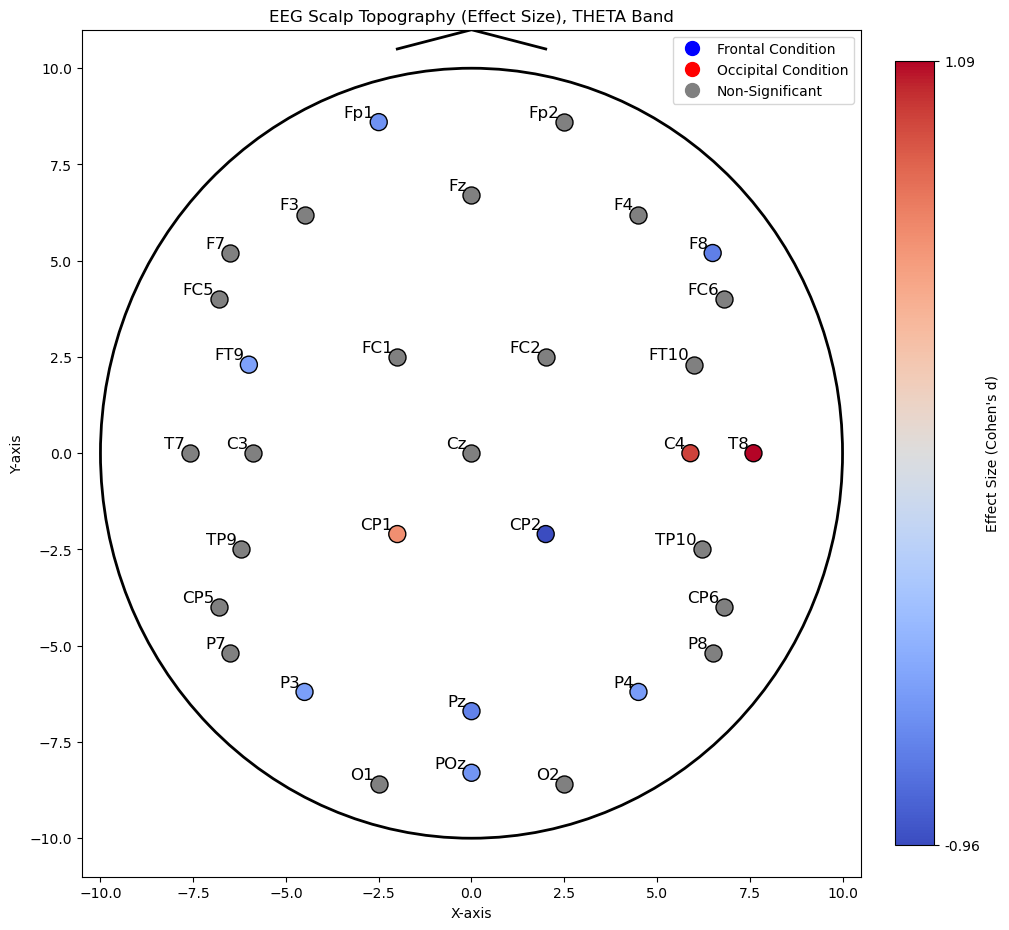

In [195]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines

file1 = r"C:\Users\nirvi\Downloads\power_spectrum.csv"
file2 = r"C:\Users\nirvi\Downloads\power_spectrum_oc.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

assert df1.shape == df2.shape, "Files do not have the same dimensions!"

df1_linear = 10**(df1 / 10)
df2_linear = 10**(df2 / 10)

alpha = 0.05

p_values = []
effect_sizes = []
row_indices = []

def cohen_d(x, y):
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

for i in range(len(df1_linear)):
    x, y = df1_linear.iloc[i, 21:45].values, df2_linear.iloc[i, 21:45].values

    t_stat, p_value = stats.ttest_rel(x, y)
    effect_size = cohen_d(x, y)

    p_values.append(p_value)
    effect_sizes.append(effect_size)
    row_indices.append(i)

_, p_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

results_df = pd.DataFrame({
    "Row_Index": row_indices,
    "Corrected_P_Value": p_corrected,
    "Effect_Size": effect_sizes
})

significant_df = results_df[(results_df["Corrected_P_Value"] < alpha) & (abs(results_df["Effect_Size"]) >= 0.2)]
non_significant_df = results_df[results_df["Corrected_P_Value"] >= alpha]

# ===================== PLOT 2D SCALP TOPOGRAPHY ===================== #
electrode_positions = {
    "Fp1": (-2.5, 8.6), "Fp2": (2.5, 8.6), "F3": (-4.5, 6.2), "F4": (4.5, 6.2),
    "C3": (-5.9, 0.0), "C4": (5.9, 0.0), "P3": (-4.5, -6.2), "P4": (4.5, -6.2),
    "O1": (-2.5, -8.6), "O2": (2.5, -8.6), "F7": (-6.5, 5.2), "F8": (6.5, 5.2),
    "T7": (-7.6, 0.0), "T8": (7.6, 0.0), "P7": (-6.5, -5.2), "P8": (6.5, -5.2),
    "Fz": (0.0, 6.7), "Cz": (0.0, 0.0), "Pz": (0.0, -6.7), "POz": (0.0, -8.3),
    "FC1": (-2.0, 2.5), "FC2": (2.0, 2.5), "CP1": (-2.0, -2.1), "CP2": (2.0, -2.1),
    "FC5": (-6.8, 4.0), "FC6": (6.8, 4.0), "CP5": (-6.8, -4.0), "CP6": (6.8, -4.0),
    "FT9": (-6.0, 2.3), "FT10": (6.0, 2.3), "TP9": (-6.2, -2.5), "TP10": (6.2, -2.5)
}

x_vals_sig, y_vals_sig, colors_sig, effect_sizes_sig = [], [], [], []

for row in significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_sig.append(x)
        y_vals_sig.append(y)
        effect_sizes_sig.append(row.Effect_Size)

x_vals_nonsig, y_vals_nonsig = [], []

for row in non_significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_nonsig.append(x)
        y_vals_nonsig.append(y)

norm = mcolors.Normalize(vmin=min(effect_sizes_sig), vmax=max(effect_sizes_sig))
colormap = cm.coolwarm  

colors_sig = [colormap(norm(e)) for e in effect_sizes_sig]

plt.figure(figsize=(11, 11))

plt.scatter(x_vals_nonsig, y_vals_nonsig, c="gray", edgecolors="black", s=150)

sc = plt.scatter(x_vals_sig, y_vals_sig, c=effect_sizes_sig, cmap=colormap, norm=norm, edgecolors="black", s=150)

head_circle = plt.Circle((0, 0), 10, color="black", fill=False, lw=2)
plt.gca().add_patch(head_circle)

plt.plot([2, 0, -2], [10.5, 11, 10.5], color="black", lw=2)  

for i, label in enumerate(electrode_positions.keys()):
    x, y = electrode_positions[label]
    plt.text(x-0.125, y+0.125, label, fontsize=12, ha='right', color="black")

plt.xlim(-10.5, 10.5)
plt.ylim(-11, 11)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("EEG Scalp Topography (Effect Size), THETA Band")

cbar = plt.colorbar(sc, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar.set_label("Effect Size (Cohen's d)")

effect_min = min(effect_sizes_sig)
effect_max = max(effect_sizes_sig)

cbar.set_ticks([effect_min,  effect_max])
cbar.set_ticklabels([f"{effect_min:.2f}", f"{effect_max:.2f}"])


blue_marker = mlines.Line2D([], [], color="blue", marker='o', linestyle='None', markersize=10, label="Frontal Condition")
red_marker = mlines.Line2D([], [], color="red", marker='o', linestyle='None', markersize=10, label="Occipital Condition")
gray_marker = mlines.Line2D([], [], color="gray", marker='o', linestyle='None', markersize=10, label="Non-Significant")
plt.legend(handles=[blue_marker, red_marker, gray_marker], loc="upper right")


plt.show()


# ALPHA

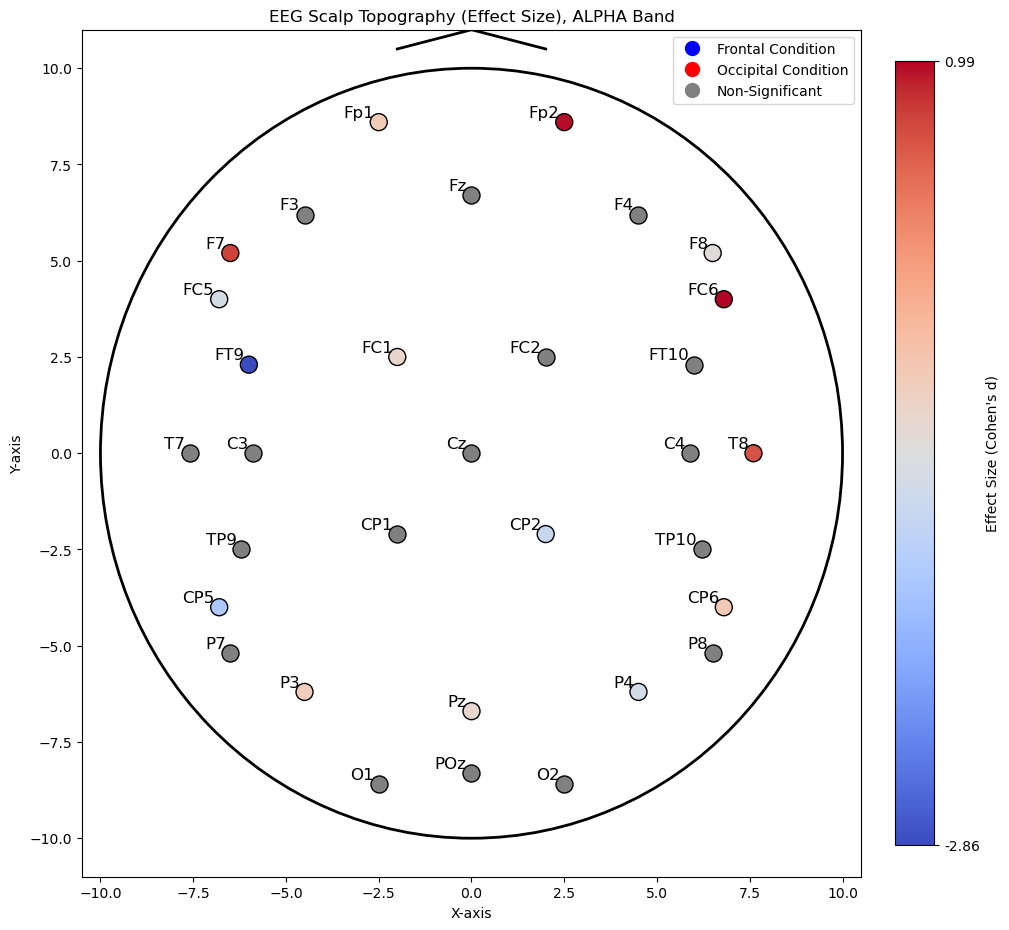

In [197]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines

file1 = r"C:\Users\nirvi\Downloads\power_spectrum.csv"
file2 = r"C:\Users\nirvi\Downloads\power_spectrum_oc.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

assert df1.shape == df2.shape, "Files do not have the same dimensions!"

df1_linear = 10**(df1 / 10)
df2_linear = 10**(df2 / 10)

alpha = 0.05

p_values = []
effect_sizes = []
row_indices = []

def cohen_d(x, y):
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

for i in range(len(df1_linear)):
    x, y = df1_linear.iloc[i, 46:70].values, df2_linear.iloc[i, 46:70].values

    t_stat, p_value = stats.ttest_rel(x, y)
    effect_size = cohen_d(x, y)

    p_values.append(p_value)
    effect_sizes.append(effect_size)
    row_indices.append(i)

_, p_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

results_df = pd.DataFrame({
    "Row_Index": row_indices,
    "Corrected_P_Value": p_corrected,
    "Effect_Size": effect_sizes
})

significant_df = results_df[(results_df["Corrected_P_Value"] < alpha) & (abs(results_df["Effect_Size"]) >= 0.2)]
non_significant_df = results_df[results_df["Corrected_P_Value"] >= alpha]

# ===================== PLOT 2D SCALP TOPOGRAPHY ===================== #
electrode_positions = {
    "Fp1": (-2.5, 8.6), "Fp2": (2.5, 8.6), "F3": (-4.5, 6.2), "F4": (4.5, 6.2),
    "C3": (-5.9, 0.0), "C4": (5.9, 0.0), "P3": (-4.5, -6.2), "P4": (4.5, -6.2),
    "O1": (-2.5, -8.6), "O2": (2.5, -8.6), "F7": (-6.5, 5.2), "F8": (6.5, 5.2),
    "T7": (-7.6, 0.0), "T8": (7.6, 0.0), "P7": (-6.5, -5.2), "P8": (6.5, -5.2),
    "Fz": (0.0, 6.7), "Cz": (0.0, 0.0), "Pz": (0.0, -6.7), "POz": (0.0, -8.3),
    "FC1": (-2.0, 2.5), "FC2": (2.0, 2.5), "CP1": (-2.0, -2.1), "CP2": (2.0, -2.1),
    "FC5": (-6.8, 4.0), "FC6": (6.8, 4.0), "CP5": (-6.8, -4.0), "CP6": (6.8, -4.0),
    "FT9": (-6.0, 2.3), "FT10": (6.0, 2.3), "TP9": (-6.2, -2.5), "TP10": (6.2, -2.5)
}

x_vals_sig, y_vals_sig, colors_sig, effect_sizes_sig = [], [], [], []

for row in significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_sig.append(x)
        y_vals_sig.append(y)
        effect_sizes_sig.append(row.Effect_Size)

x_vals_nonsig, y_vals_nonsig = [], []

for row in non_significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_nonsig.append(x)
        y_vals_nonsig.append(y)

norm = mcolors.Normalize(vmin=min(effect_sizes_sig), vmax=max(effect_sizes_sig))
colormap = cm.coolwarm  

colors_sig = [colormap(norm(e)) for e in effect_sizes_sig]

plt.figure(figsize=(11, 11))

plt.scatter(x_vals_nonsig, y_vals_nonsig, c="gray", edgecolors="black", s=150)

sc = plt.scatter(x_vals_sig, y_vals_sig, c=effect_sizes_sig, cmap=colormap, norm=norm, edgecolors="black", s=150)

head_circle = plt.Circle((0, 0), 10, color="black", fill=False, lw=2)
plt.gca().add_patch(head_circle)

plt.plot([2, 0, -2], [10.5, 11, 10.5], color="black", lw=2)  

for i, label in enumerate(electrode_positions.keys()):
    x, y = electrode_positions[label]
    plt.text(x-0.125, y+0.125, label, fontsize=12, ha='right', color="black")

plt.xlim(-10.5, 10.5)
plt.ylim(-11, 11)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("EEG Scalp Topography (Effect Size), ALPHA Band")

cbar = plt.colorbar(sc, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar.set_label("Effect Size (Cohen's d)")

effect_min = min(effect_sizes_sig)
effect_max = max(effect_sizes_sig)

cbar.set_ticks([effect_min,  effect_max])
cbar.set_ticklabels([f"{effect_min:.2f}", f"{effect_max:.2f}"])


blue_marker = mlines.Line2D([], [], color="blue", marker='o', linestyle='None', markersize=10, label="Frontal Condition")
red_marker = mlines.Line2D([], [], color="red", marker='o', linestyle='None', markersize=10, label="Occipital Condition")
gray_marker = mlines.Line2D([], [], color="gray", marker='o', linestyle='None', markersize=10, label="Non-Significant")
plt.legend(handles=[blue_marker, red_marker, gray_marker], loc="upper right")


plt.show()


# BETA

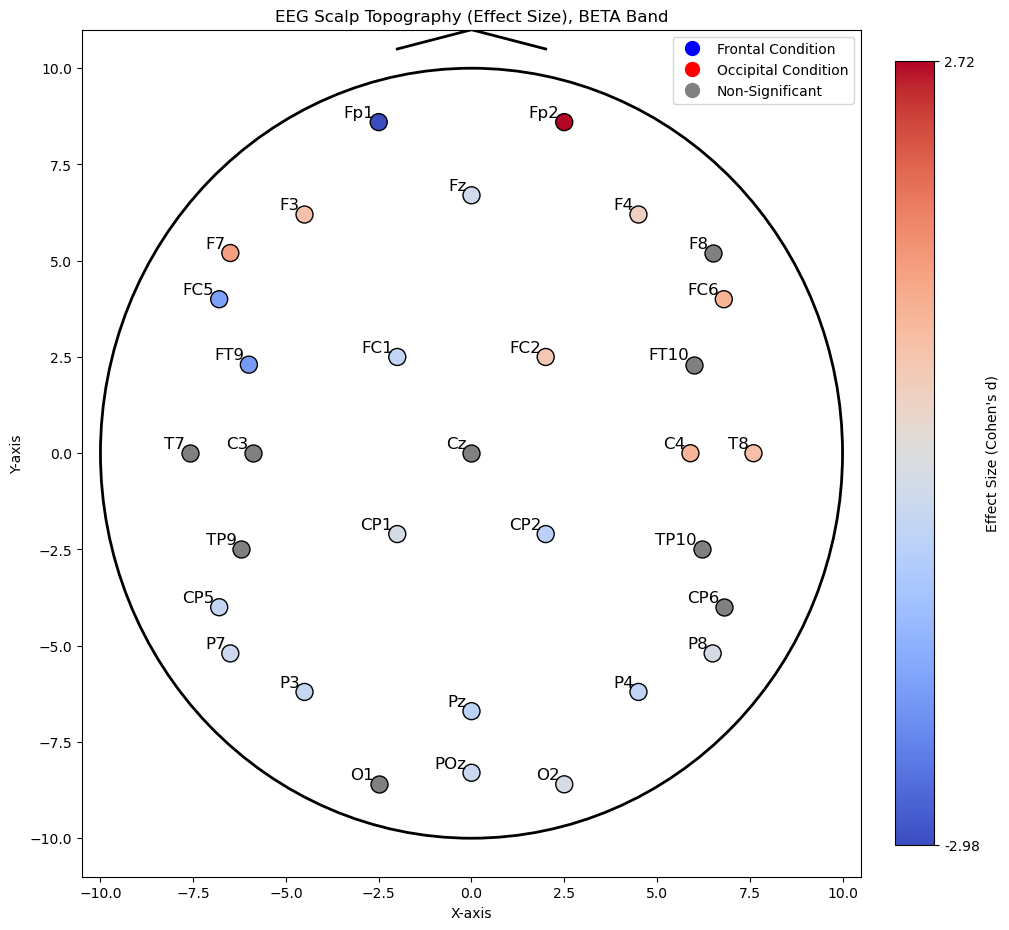

In [199]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines

file1 = r"C:\Users\nirvi\Downloads\power_spectrum.csv"
file2 = r"C:\Users\nirvi\Downloads\power_spectrum_oc.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

assert df1.shape == df2.shape, "Files do not have the same dimensions!"

df1_linear = 10**(df1 / 10)
df2_linear = 10**(df2 / 10)

alpha = 0.05

p_values = []
effect_sizes = []
row_indices = []

def cohen_d(x, y):
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

for i in range(len(df1_linear)):
    x, y = df1_linear.iloc[i, 71:170].values, df2_linear.iloc[i, 71:170].values

    t_stat, p_value = stats.ttest_rel(x, y)
    effect_size = cohen_d(x, y)

    p_values.append(p_value)
    effect_sizes.append(effect_size)
    row_indices.append(i)

_, p_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

results_df = pd.DataFrame({
    "Row_Index": row_indices,
    "Corrected_P_Value": p_corrected,
    "Effect_Size": effect_sizes
})

significant_df = results_df[(results_df["Corrected_P_Value"] < alpha) & (abs(results_df["Effect_Size"]) >= 0.2)]
non_significant_df = results_df[results_df["Corrected_P_Value"] >= alpha]

# ===================== PLOT 2D SCALP TOPOGRAPHY ===================== #
electrode_positions = {
    "Fp1": (-2.5, 8.6), "Fp2": (2.5, 8.6), "F3": (-4.5, 6.2), "F4": (4.5, 6.2),
    "C3": (-5.9, 0.0), "C4": (5.9, 0.0), "P3": (-4.5, -6.2), "P4": (4.5, -6.2),
    "O1": (-2.5, -8.6), "O2": (2.5, -8.6), "F7": (-6.5, 5.2), "F8": (6.5, 5.2),
    "T7": (-7.6, 0.0), "T8": (7.6, 0.0), "P7": (-6.5, -5.2), "P8": (6.5, -5.2),
    "Fz": (0.0, 6.7), "Cz": (0.0, 0.0), "Pz": (0.0, -6.7), "POz": (0.0, -8.3),
    "FC1": (-2.0, 2.5), "FC2": (2.0, 2.5), "CP1": (-2.0, -2.1), "CP2": (2.0, -2.1),
    "FC5": (-6.8, 4.0), "FC6": (6.8, 4.0), "CP5": (-6.8, -4.0), "CP6": (6.8, -4.0),
    "FT9": (-6.0, 2.3), "FT10": (6.0, 2.3), "TP9": (-6.2, -2.5), "TP10": (6.2, -2.5)
}

x_vals_sig, y_vals_sig, colors_sig, effect_sizes_sig = [], [], [], []

for row in significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_sig.append(x)
        y_vals_sig.append(y)
        effect_sizes_sig.append(row.Effect_Size)

x_vals_nonsig, y_vals_nonsig = [], []

for row in non_significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_nonsig.append(x)
        y_vals_nonsig.append(y)

norm = mcolors.Normalize(vmin=min(effect_sizes_sig), vmax=max(effect_sizes_sig))
colormap = cm.coolwarm  

colors_sig = [colormap(norm(e)) for e in effect_sizes_sig]

plt.figure(figsize=(11, 11))

plt.scatter(x_vals_nonsig, y_vals_nonsig, c="gray", edgecolors="black", s=150)

sc = plt.scatter(x_vals_sig, y_vals_sig, c=effect_sizes_sig, cmap=colormap, norm=norm, edgecolors="black", s=150)

head_circle = plt.Circle((0, 0), 10, color="black", fill=False, lw=2)
plt.gca().add_patch(head_circle)

plt.plot([2, 0, -2], [10.5, 11, 10.5], color="black", lw=2)  

for i, label in enumerate(electrode_positions.keys()):
    x, y = electrode_positions[label]
    plt.text(x-0.125, y+0.125, label, fontsize=12, ha='right', color="black")

plt.xlim(-10.5, 10.5)
plt.ylim(-11, 11)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("EEG Scalp Topography (Effect Size), BETA Band")

cbar = plt.colorbar(sc, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar.set_label("Effect Size (Cohen's d)")

effect_min = min(effect_sizes_sig)
effect_max = max(effect_sizes_sig)

cbar.set_ticks([effect_min,  effect_max])
cbar.set_ticklabels([f"{effect_min:.2f}", f"{effect_max:.2f}"])


blue_marker = mlines.Line2D([], [], color="blue", marker='o', linestyle='None', markersize=10, label="Frontal Condition")
red_marker = mlines.Line2D([], [], color="red", marker='o', linestyle='None', markersize=10, label="Occipital Condition")
gray_marker = mlines.Line2D([], [], color="gray", marker='o', linestyle='None', markersize=10, label="Non-Significant")
plt.legend(handles=[blue_marker, red_marker, gray_marker], loc="upper right")


plt.show()


# GAMMA

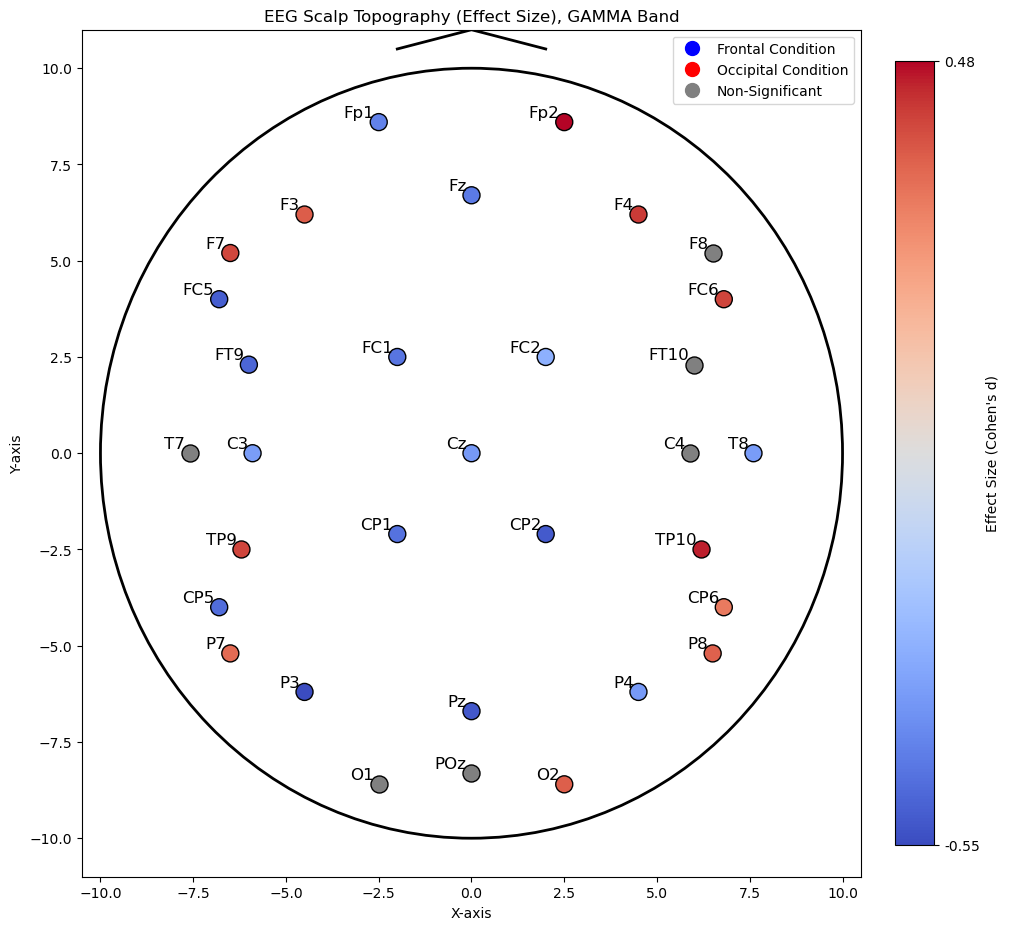

In [201]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines

file1 = r"C:\Users\nirvi\Downloads\power_spectrum.csv"
file2 = r"C:\Users\nirvi\Downloads\power_spectrum_oc.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

assert df1.shape == df2.shape, "Files do not have the same dimensions!"

df1_linear = 10**(df1 / 10)
df2_linear = 10**(df2 / 10)

alpha = 0.05

p_values = []
effect_sizes = []
row_indices = []

def cohen_d(x, y):
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

for i in range(len(df1_linear)):
    x, y = df1_linear.iloc[i, 171:255].values, df2_linear.iloc[i, 171:255].values

    t_stat, p_value = stats.ttest_rel(x, y)
    effect_size = cohen_d(x, y)

    p_values.append(p_value)
    effect_sizes.append(effect_size)
    row_indices.append(i)

_, p_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

results_df = pd.DataFrame({
    "Row_Index": row_indices,
    "Corrected_P_Value": p_corrected,
    "Effect_Size": effect_sizes
})

significant_df = results_df[(results_df["Corrected_P_Value"] < alpha) & (abs(results_df["Effect_Size"]) >= 0.2)]
non_significant_df = results_df[results_df["Corrected_P_Value"] >= alpha]

# ===================== PLOT 2D SCALP TOPOGRAPHY ===================== #
electrode_positions = {
    "Fp1": (-2.5, 8.6), "Fp2": (2.5, 8.6), "F3": (-4.5, 6.2), "F4": (4.5, 6.2),
    "C3": (-5.9, 0.0), "C4": (5.9, 0.0), "P3": (-4.5, -6.2), "P4": (4.5, -6.2),
    "O1": (-2.5, -8.6), "O2": (2.5, -8.6), "F7": (-6.5, 5.2), "F8": (6.5, 5.2),
    "T7": (-7.6, 0.0), "T8": (7.6, 0.0), "P7": (-6.5, -5.2), "P8": (6.5, -5.2),
    "Fz": (0.0, 6.7), "Cz": (0.0, 0.0), "Pz": (0.0, -6.7), "POz": (0.0, -8.3),
    "FC1": (-2.0, 2.5), "FC2": (2.0, 2.5), "CP1": (-2.0, -2.1), "CP2": (2.0, -2.1),
    "FC5": (-6.8, 4.0), "FC6": (6.8, 4.0), "CP5": (-6.8, -4.0), "CP6": (6.8, -4.0),
    "FT9": (-6.0, 2.3), "FT10": (6.0, 2.3), "TP9": (-6.2, -2.5), "TP10": (6.2, -2.5)
}

x_vals_sig, y_vals_sig, colors_sig, effect_sizes_sig = [], [], [], []

for row in significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_sig.append(x)
        y_vals_sig.append(y)
        effect_sizes_sig.append(row.Effect_Size)

x_vals_nonsig, y_vals_nonsig = [], []

for row in non_significant_df.itertuples():
    row_idx = int(row.Row_Index)
    
    if row_idx < len(electrode_positions):
        electrode_label = list(electrode_positions.keys())[row_idx]
        x, y = electrode_positions[electrode_label]
        
        x_vals_nonsig.append(x)
        y_vals_nonsig.append(y)

norm = mcolors.Normalize(vmin=min(effect_sizes_sig), vmax=max(effect_sizes_sig))
colormap = cm.coolwarm  

colors_sig = [colormap(norm(e)) for e in effect_sizes_sig]

plt.figure(figsize=(11, 11))

plt.scatter(x_vals_nonsig, y_vals_nonsig, c="gray", edgecolors="black", s=150)

sc = plt.scatter(x_vals_sig, y_vals_sig, c=effect_sizes_sig, cmap=colormap, norm=norm, edgecolors="black", s=150)

head_circle = plt.Circle((0, 0), 10, color="black", fill=False, lw=2)
plt.gca().add_patch(head_circle)

plt.plot([2, 0, -2], [10.5, 11, 10.5], color="black", lw=2)  

for i, label in enumerate(electrode_positions.keys()):
    x, y = electrode_positions[label]
    plt.text(x-0.125, y+0.125, label, fontsize=12, ha='right', color="black")

plt.xlim(-10.5, 10.5)
plt.ylim(-11, 11)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("EEG Scalp Topography (Effect Size), GAMMA Band")

cbar = plt.colorbar(sc, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar.set_label("Effect Size (Cohen's d)")

effect_min = min(effect_sizes_sig)
effect_max = max(effect_sizes_sig)

cbar.set_ticks([effect_min,  effect_max])
cbar.set_ticklabels([f"{effect_min:.2f}", f"{effect_max:.2f}"])


blue_marker = mlines.Line2D([], [], color="blue", marker='o', linestyle='None', markersize=10, label="Frontal Condition")
red_marker = mlines.Line2D([], [], color="red", marker='o', linestyle='None', markersize=10, label="Occipital Condition")
gray_marker = mlines.Line2D([], [], color="gray", marker='o', linestyle='None', markersize=10, label="Non-Significant")
plt.legend(handles=[blue_marker, red_marker, gray_marker], loc="upper right")


plt.show()
